<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes  We will use CNN for classification

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [5]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

lets see some images what they look

In [20]:
def plot_sample(x,y,index):
    plt.figure(figsize=(10,1))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

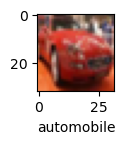

In [21]:
plot_sample(x_train,y_train,5)

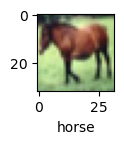

In [23]:
plot_sample(x_train,y_train,7)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [24]:
x_train=x_train/255
x_test=x_test/255

##### First lets check using ANN then we will see using CNN

In [26]:
ann = models.Sequential([
       layers.Flatten(input_shape=(32,32,3)),
       layers.Dense(2700, activation='relu'),
       layers.Dense(1000, activation='relu'),
       layers.Dense(10, activation='softmax')    
    ])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.8139 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.6227 - accuracy: 0.4281
Epoch 3/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5436 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4826 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.4345 - accuracy: 0.4956


You can see that at the end of 5 epochs, accuracy is at around 49%

In [27]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 16ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.59      0.58      1000
           1       0.58      0.66      0.62      1000
           2       0.44      0.23      0.30      1000
           3       0.28      0.51      0.36      1000
           4       0.45      0.43      0.44      1000
           5       0.40      0.34      0.37      1000
           6       0.53      0.56      0.54      1000
           7       0.60      0.52      0.56      1000
           8       0.63      0.61      0.62      1000
           9       0.61      0.49      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



#### Now Lets see the difference we get while we use CNN

In [28]:
cnn=models.Sequential([
    layers.Conv2D(filters=60,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4725 - accuracy: 0.4706
Epoch 2/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.1063 - accuracy: 0.6131
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9794 - accuracy: 0.6605
Epoch 4/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8945 - accuracy: 0.6901
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8334 - accuracy: 0.7083
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7800 - accuracy: 0.7277
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7379 - accuracy: 0.7425
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6962 - accuracy: 0.7577
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6592 - accuracy: 0.7712
Epoch 10/10
1563/1563 [==============================] - 50s 32m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [31]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.8930 - accuracy: 0.6986


[0.8930007815361023, 0.6985999941825867]

In [33]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[1.2255902e-04, 4.6590128e-05, 7.9798268e-04, 8.0698997e-01,
        5.5914233e-03, 1.4371642e-01, 5.4721199e-03, 3.2611810e-05,
        3.7154365e-02, 7.5983255e-05],
       [1.4522144e-03, 5.4072425e-02, 5.6172280e-07, 5.5674053e-07,
        1.4103366e-08, 5.9971178e-08, 5.6665911e-10, 4.4363229e-09,
        9.3984711e-01, 4.6270974e-03],
       [2.4097569e-01, 4.5102715e-02, 3.4933407e-03, 9.8979818e-03,
        1.2866351e-02, 2.1667643e-03, 1.8759635e-04, 9.6461074e-03,
        6.1290747e-01, 6.2756002e-02],
       [9.4432509e-01, 7.0234895e-04, 4.4048700e-02, 3.7963863e-04,
        4.2021144e-05, 6.7038673e-06, 1.1643500e-04, 8.7933304e-06,
        1.0362859e-02, 7.3932101e-06],
       [2.3667985e-06, 6.2001076e-05, 8.8138999e-03, 1.0388618e-01,
        6.7393643e-01, 6.5491810e-03, 2.0664367e-01, 3.8537660e-06,
        9.9336488e-05, 3.0815193e-06]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

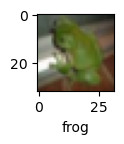

In [43]:
plot_sample(x_test, y_test,7)

In [44]:
classes[y_classes[7]]

'frog'